In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 7.0MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 1.0MB 39.2MB/s 
     |████████████████████████████████| 194kB 43.4MB/s 
     |████████████████████████████████| 92kB 10.6MB/s 
     |████████████████████████████████| 40kB 5.8MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
     |████████████████████████████████| 2.6MB 40.3MB/s 
Mounted at /content/gdrive


In [ ]:
from fastbook import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from fastai.vision import*

In [ ]:
path=untar_data(URLs.MNIST_SAMPLE);path

Path('/root/.fastai/data/mnist_sample')

In [ ]:
from fastai.vision.data import ImageDataLoaders
data=data = ImageDataLoaders.from_folder(path)

In [ ]:
from fastai.vision.all import*

In [ ]:
path=untar_data(URLs.PETS)

In [ ]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [ ]:
files=get_image_files(path/"images")

In [ ]:
len(files)

7390

In [ ]:
files[0],files[6]

(Path('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_177.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_117.jpg'))

In [ ]:
def label_func(f): return f[0].isupper()

In [ ]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

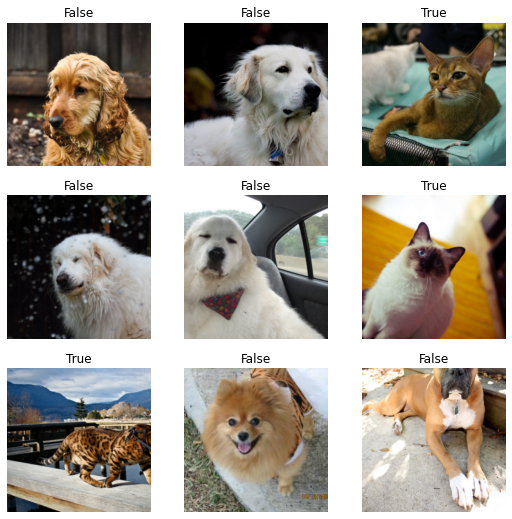

In [ ]:
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.predict(files[0])

('False', tensor(0), tensor([9.9998e-01, 1.8272e-05]))

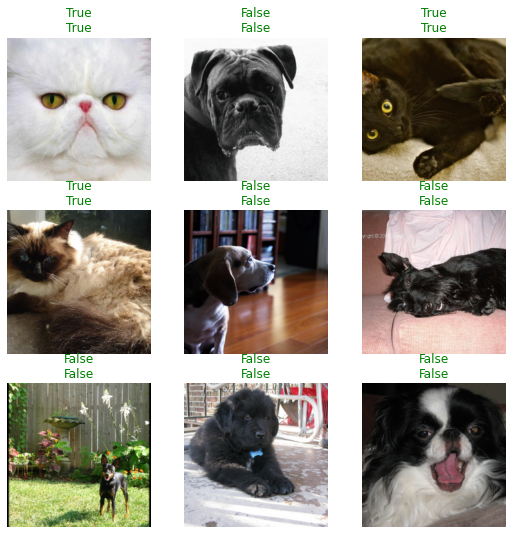

In [ ]:
learn.show_results()

In [ ]:
files[0].name

'american_bulldog_177.jpg'

In [ ]:
pat = r'^(.*)_\d+.jpg'

In [ ]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))


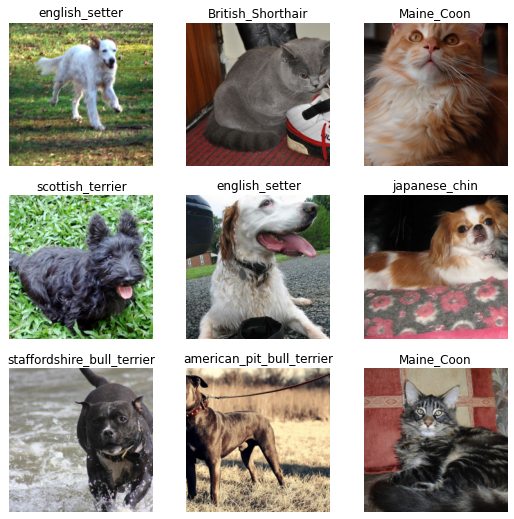

In [ ]:
dls.show_batch()


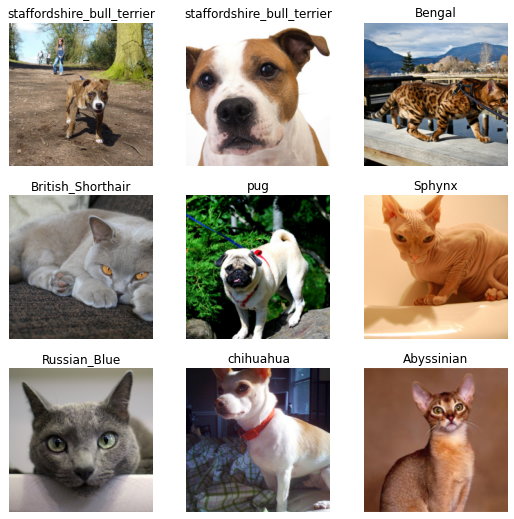

In [ ]:
dls.show_batch()

In [ ]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224))


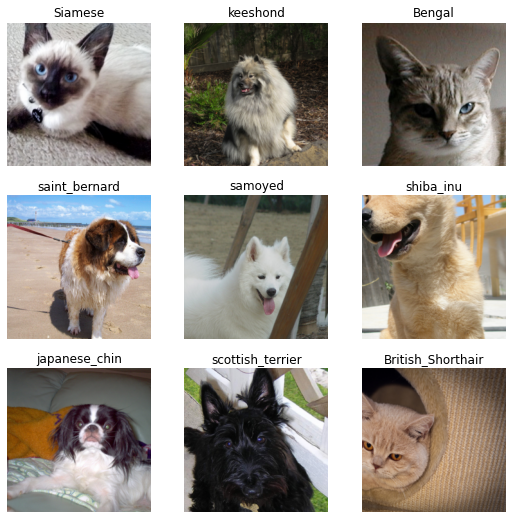

In [ ]:
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.004365158267319202)

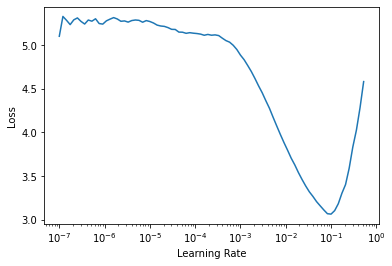

In [ ]:
learn.lr_find()

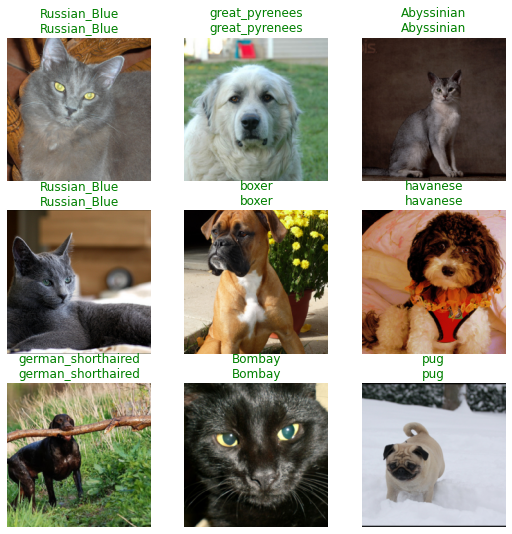

In [ ]:
learn.fine_tune(4, 3e-3)
learn.show_results()

In [ ]:
interp = Interpretation.from_learner(learn)

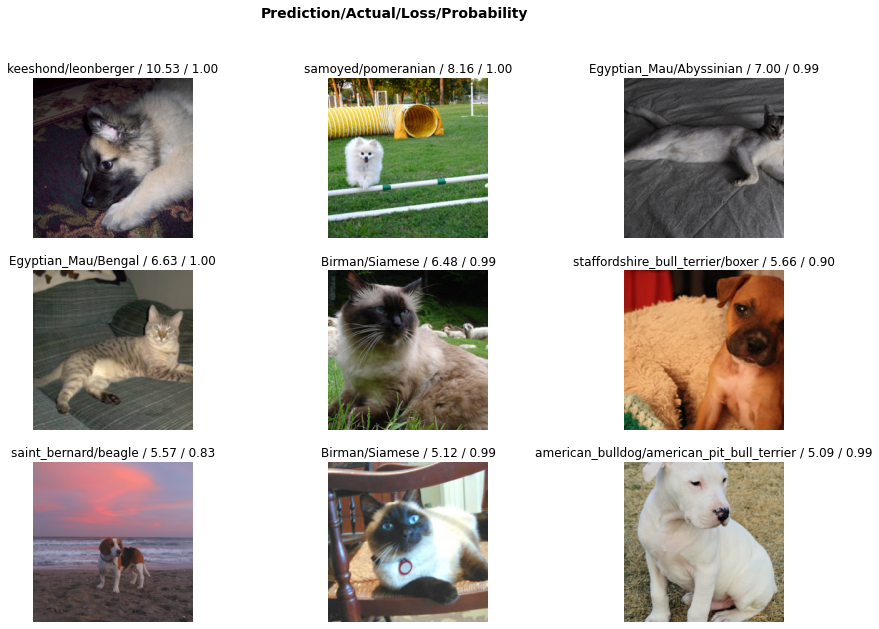

In [ ]:
interp.plot_top_losses(9, figsize=(15,10))

In [ ]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                 get_items=get_image_files, 
                 splitter=RandomSplitter(),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224))

In [ ]:
dls = pets.dataloaders(untar_data(URLs.PETS)/"images")

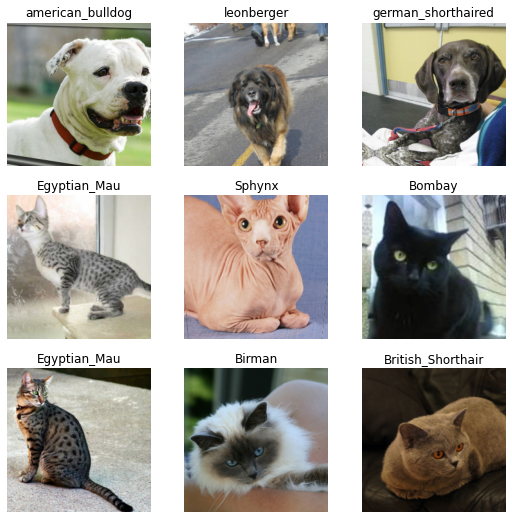

In [ ]:
dls.show_batch(max_n=9)

In [ ]:
path = untar_data(URLs.PASCAL_2007)
path.ls()

(#8) [Path('/root/.fastai/data/pascal_2007/train.csv'),Path('/root/.fastai/data/pascal_2007/test.json'),Path('/root/.fastai/data/pascal_2007/train.json'),Path('/root/.fastai/data/pascal_2007/segmentation'),Path('/root/.fastai/data/pascal_2007/valid.json'),Path('/root/.fastai/data/pascal_2007/train'),Path('/root/.fastai/data/pascal_2007/test.csv'),Path('/root/.fastai/data/pascal_2007/test')]

In [ ]:
df = pd.read_csv(path/'train.csv')
df.head()

fname        labels  is_valid
0  000005.jpg         chair      True
1  000007.jpg           car      True
2  000009.jpg  horse person      True
3  000012.jpg           car     False
4  000016.jpg       bicycle      True

In [ ]:
dls = ImageDataLoaders.from_df(df, path, folder='train', valid_col='is_valid', label_delim=' ',
                               item_tfms=Resize(460), batch_tfms=aug_transforms(size=224))

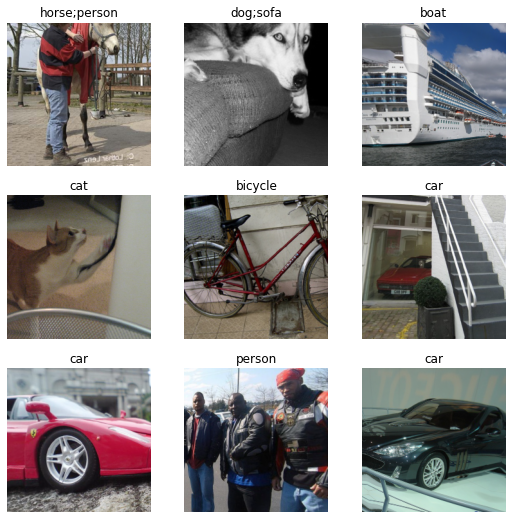

In [ ]:
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.5))

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


SuggestedLRs(lr_min=0.025118863582611083, lr_steep=0.033113110810518265)

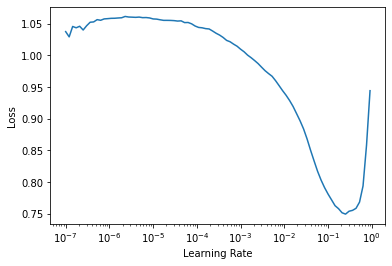

In [ ]:
learn.lr_find()


In [ ]:
learn.fine_tune(4, 3e-2)

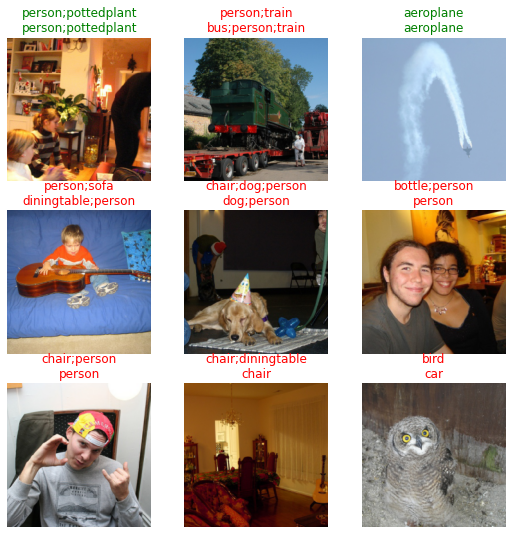

In [ ]:
learn.show_results()

In [ ]:
learn.predict(path/'train/000005.jpg')


((#1) ['chair'],
 tensor([False, False, False, False, False, False, False, False,  True, False, False, False, False, False, False, False, False, False, False, False]),
 tensor([3.0956e-03, 2.9712e-03, 8.2641e-04, 7.1346e-04, 2.6036e-02, 2.3743e-03, 2.0510e-03, 7.3945e-04, 8.9187e-01, 2.4235e-04, 4.1046e-01, 1.1783e-02, 1.3068e-03, 1.5950e-03, 3.6143e-01, 5.5244e-02,
         2.1531e-04, 9.3275e-02, 7.3484e-03, 6.9431e-02]))

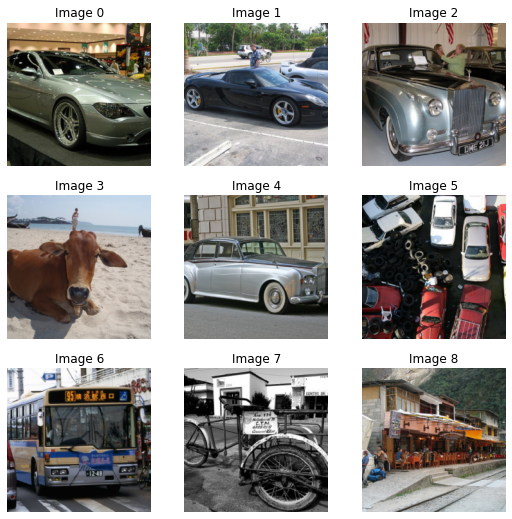

In [ ]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9)

In [ ]:
df.head()


fname        labels  is_valid
0  000005.jpg         chair      True
1  000007.jpg           car      True
2  000009.jpg  horse person      True
3  000012.jpg           car     False
4  000016.jpg       bicycle      True

In [ ]:
pascal = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=ColSplitter('is_valid'),
                   get_x=ColReader('fname', pref=str(path/'train') + os.path.sep),
                   get_y=ColReader('labels', label_delim=' '),
                   item_tfms = Resize(460),
                   batch_tfms=aug_transforms(size=224))

In [ ]:
dls = pascal.dataloaders(df)

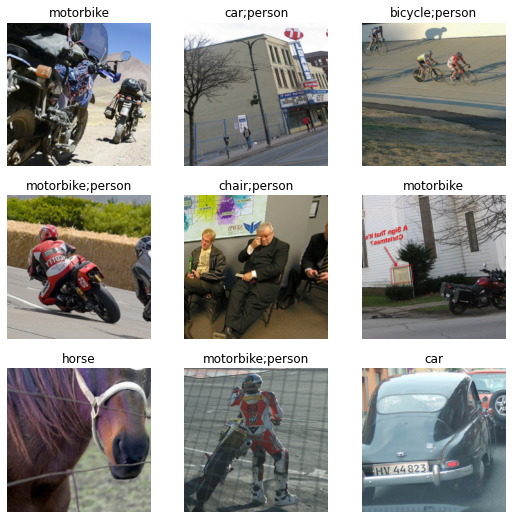

In [ ]:
dls.show_batch(max_n=9)